In [1]:
import pandas as pd

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [2]:
data = pd.read_csv('C:\\Users\\user\\Desktop\\python\\recommend_place\\data.csv', encoding='UTF-8')
data.head(3)


,年別,戶外,評分,細分,分類,縣市別,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月,12月,合計
0,2020,1,4.2,鶯歌老街,1,新北市,65686,78398,57664,65141,88066,78413,77386,88000,88769,85520,85520,65666,924229
1,2020,1,4.2,三峽老街,1,新北市,300000,182000,84000,63000,71000,95000,127000,144000,150000,146000,128000,131000,1621000
2,2020,1,4.3,八里左岸公園,2,新北市,263000,294000,281900,222000,289000,321300,272000,340200,281880,411480,354240,316440,3647440


In [7]:
import warnings

# 忽略UserWarning類型的警告
warnings.simplefilter("ignore", category=UserWarning)
import pandas as pd
import ipywidgets as widgets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from IPython.display import display

mon_input = widgets.IntSlider(min=1, max=12, step=1, description='月份:')
rat_input = widgets.FloatSlider(min=1, max=5, step=0.1, description='評分:')
s_input = widgets.RadioButtons(options=['是', '否'], description='是否希望戶外:',style={'description_width': 'initial'})
classify_input = widgets.ToggleButtons(options=["平地","海邊","山上" ], description='景點類型:')
much_input = widgets.ToggleButtons(options=['是', '否'], description='可否接受人多:',style={'description_width': 'initial'})
classify_mapping = {
    "平地": 1,
    "海邊": 2,
    "山上": 3
}
submit_button = widgets.Button(description='提交')
model = NearestNeighbors(n_neighbors=3)
scaler = StandardScaler()


def handle_submit_button(sender):
    mon = int(mon_input.value)
    s = s_input.value
    rat = rat_input.value
    classify = classify_input.value
    much = much_input.value
    classifynum = classify_mapping[classify_input.value]
    if s == '是':
        out = 1
    else:
        out = 0
    
    print(f"在 {mon} 月份，希望戶外:{s}，{classify}項活動 評分為 {rat} 的情況下")
    features = pd.DataFrame(data, columns=[str(mon) + '月', '評分', '戶外', '分類'])
    
    features_scaled = scaler.fit_transform(features)

    # 定義KNN模型，n_neighbors為鄰近數
    
    model.fit(features_scaled)
    recommend_place(out,rat,classifynum,much)
    
def recommend_place(is_outdoor, rating,classify,much):
    
    target_features = [0, 0, 0, 0]  # 初始化目標特徵列表為零
    
    target_features[1:] = [rating, is_outdoor, classify]  # 設置評分、戶外和分類值
    
    if much=="是":
        target_features[0] = 200000
    else:
        target_features[0] = 20000
    ##############################


    # 特徵值進行標準化
    target_features_scaled = scaler.transform([target_features])
    
    distances, indices = model.kneighbors(target_features_scaled)

    print('推薦的旅遊景點：')

    for i in indices[0]:
        
        print("第{:>2d}項 :".format(i), end="")
        print(data.iloc[i]['細分'])
    print("=========================\n")
        



submit_button.on_click(handle_submit_button)


input_widgets = [mon_input, s_input, rat_input, classify_input, much_input, submit_button]


display(*input_widgets)

IntSlider(value=1, description='月份:', max=12, min=1)

RadioButtons(description='是否希望戶外:', options=('是', '否'), style=DescriptionStyle(description_width='initial'), v…

FloatSlider(value=1.0, description='評分:', max=5.0, min=1.0)

ToggleButtons(description='景點類型:', options=('平地', '海邊', '山上'), value='平地')

ToggleButtons(description='可否接受人多:', options=('是', '否'), style=ToggleButtonsStyle(description_width='initial')…

Button(description='提交', style=ButtonStyle())

在 8 月份，希望戶外:是，海邊項活動 評分為 4.0 的情況下
推薦的旅遊景點：
第34項 :鹽寮福隆遊憩區
第 1項 :三峽老街
第 2項 :八里左岸公園



範例資料:

1.三峽老街* 2.林口三井outlet 3.新北市立十三行博物館 7月 戶外 4.2分 人多

1.八里左岸公園 2.野柳海洋世界* 3.白沙灣 7月 室內 4.2分 人少

1.大阪跟森林溫泉渡假村* 2.瑞芳風景特定區 3.烏來風景特定區1月 室內 4.3分 人少

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
data = pd.read_csv('C:\\Users\\user\\Desktop\\python\\recommend_place\\data.csv', encoding='UTF-8')

features = pd.DataFrame(data, columns=['1月', '2月', '3月', '4月', '5月', '6月', '7月', '8月', '9月', '10月', '11月', '12月', '評分', '戶外', '分類'])

X = features.drop(columns=['分類'])
y = features['分類']

# 將數據集分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 定義KNN模型，n_neighbors為鄰近數
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 預測測試集
y_pred = knn.predict(X_test)

# 計算準確度
accuracy = accuracy_score(y_test, y_pred)
print("模型準確度：", accuracy)

模型準確度： 0.42857142857142855


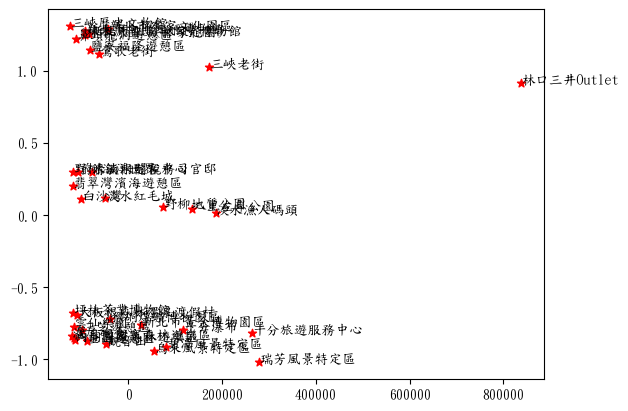

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# 設定PCA模型，降至二維
features = pd.DataFrame(data, columns=[str(mon_input.value) + '月', '評分', '戶外', '分類'])
pca = PCA(n_components=2)

# 將特徵向量降維至二維
features_pca = pca.fit_transform(features)

# 設定標楷字體
plt.rcParams['font.sans-serif'] = ['DFKai-SB'] 
plt.rcParams['axes.unicode_minus'] = False

# 取出每個景點的x, y坐標
x_coords = features_pca[:, 0]
y_coords = features_pca[:, 1]


# 繪製散點圖
plt.scatter(x_coords, y_coords, c='red', marker='*')
names = data['細分']
# 將每個點的名稱標示出來
for i, name in enumerate(names):
    plt.annotate(name, (x_coords[i], y_coords[i]))
    
# 顯示圖形
plt.show()